# Analyse Financière de Vente de Vélos

## I. Présentation du DataFrame

In [24]:
import pandas as pd # Importation de la bibliothèque Pandas pour la manipulation des données
# Définition du chemin du fichier CSV contenant les données financières
file_path = r"C:\Users\33766\OneDrive\Bureau\Financials.csv"

# Chargement du fichier CSV dans un DataFrame Pandas
df = pd.read_csv(file_path, delimiter = ",")
df 

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,"$2,475.00",$260.00,$300.00,"$7,42,500.00","$1,11,375.00","$6,31,125.00","$6,18,750.00","$12,375.00",01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,$546.00,$260.00,$300.00,"$1,63,800.00","$24,570.00","$1,39,230.00","$1,36,500.00","$2,730.00",01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,"$1,368.00",$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00","$1,299.60",01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,$723.00,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",$686.85,01/04/2014,4,April,2014


## II) Description des colonnes



## III. Étapes suivies (ETL) et code utilisé

### 1) Extraction
•	Les données ont été chargées à partir du fichier CSV pris sur Kaggle 
•	Utilisation de pandas pour la lecture du fichier :

### 2) Transformation
Plusieurs transformations ont été effectuées pour nettoyer et préparer les données :
•	Conversion des valeurs monétaires en format numérique :
•	Correction des erreurs (enlever les espaces, les virgules, les caractères spéciaux)
•	Nettoyage des noms de colonnes en supprimant les espaces
•	Vérification des colonnes nettoyées
•	Vérification des valeurs manquantes dans chaque colonne
•	Fonction de conversion des valeurs en float
•	Suppression de colonnes inutiles


In [25]:
# Liste des colonnes à nettoyer
cols_to_clean = [
    "Units Sold", "Manufacturing Price", "Sale Price", 
    "Gross Sales", "Discounts", "Sales", "COGS", "Profit"
]

# Suppression des espaces en début/fin des noms de colonnes
df.columns = df.columns.str.strip()

# Appliquer le nettoyage aux colonnes concernées
for col in cols_to_clean:
    df[col] = df[col].astype(str)  # Convertir en string
    df[col] = df[col].str.replace("[$,]", "", regex=True)  # Supprimer $ et ,
    df[col] = df[col].str.replace(r"\((.*)\)", r"-\1", regex=True)  # Convertir (1234.56) en -1234.56
    df[col] = df[col].str.replace("-", "0")  # Remplacer les - seuls par 0
    df[col] = df[col].astype(float)  # Convertir en float
    
# Suppression des colonne Date	et Month Number
df_cleaned = df.drop(columns=["Month Number", "Date"])
df_cleaned

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.00,32370.00,16185.0,16185.00,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.00,26420.00,13210.0,13210.00,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.00,32670.00,21780.0,10890.00,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.00,13320.00,8880.0,4440.00,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.00,37050.00,24700.0,12350.00,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260.0,300.0,742500.0,111375.00,631125.00,618750.0,12375.00,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,24570.00,139230.00,136500.0,2730.00,October,2014
697,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,1436.40,8139.60,6840.0,1299.60,February,2014
698,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,759.15,4301.85,3615.0,686.85,April,2014


### 3)Nettoyage et traitement des données


In [26]:
# Affichage des informations générales sur le DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Segment              700 non-null    object 
 1   Country              700 non-null    object 
 2   Product              700 non-null    object 
 3   Discount Band        700 non-null    object 
 4   Units Sold           700 non-null    float64
 5   Manufacturing Price  700 non-null    float64
 6   Sale Price           700 non-null    float64
 7   Gross Sales          700 non-null    float64
 8   Discounts            700 non-null    float64
 9   Sales                700 non-null    float64
 10  COGS                 700 non-null    float64
 11  Profit               700 non-null    float64
 12  Date                 700 non-null    object 
 13  Month Number         700 non-null    int64  
 14  Month Name           700 non-null    object 
 15  Year                 700 non-null    int

In [27]:
# Vérification du nombre de doublons dans les données
df_cleaned.duplicated().sum()

0

In [28]:
#Comptage des valeurs égales à zéro par colonne
zero_counts = (df_cleaned == 0).sum()
print(zero_counts)

Segment                 0
Country                 0
Product                 0
Discount Band           0
Units Sold              0
Manufacturing Price     0
Sale Price              0
Gross Sales             0
Discounts              53
Sales                   0
COGS                    0
Profit                  5
Month Name              0
Year                    0
dtype: int64


In [29]:
# Affichage des statistiques descriptives du DataFrame
df_cleaned.describe().round(2)

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Year
count,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00
mean,1608.29,96.48,118.43,182759.43,13150.35,169609.07,145475.21,26354.78,2013.75
std,867.43,108.60,136.78,254262.28,22962.93,236726.35,203865.51,41426.80,0.43
min,200.00,3.00,7.00,1799.00,0.00,1655.08,918.00,0.00,2013.00
25%,905.00,5.00,12.00,17391.75,800.32,15928.00,7490.00,3815.71,2013.75
50%,1542.50,10.00,20.00,37980.00,2585.25,35540.20,22506.25,11110.55,2014.00
75%,2229.12,250.00,300.00,279025.00,15956.35,261077.50,245607.50,23756.36,2014.00
max,4492.50,260.00,350.00,1207500.00,149677.50,1159200.00,950625.00,262200.00,2014.00


In [30]:
import pandas as pd
import matplotlib.pyplot as plt # Importation de Matplotlib pour la visualisation
import seaborn as sns # Importation de Seaborn pour les graphiques avancés

# Sélectionner les colonnes numériques en excluant "Year"
numerical_cols = df_cleaned.select_dtypes(include=['number']).drop(columns=['Year'], errors='ignore')

# Détection des valeurs aberrantes avec la méthode IQR
Q1 = numerical_cols.quantile(0.25)
Q3 = numerical_cols.quantile(0.75)
IQR = Q3 - Q1

# Définition des seuils
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les valeurs aberrantes
outliers = ((numerical_cols < lower_bound) | (numerical_cols > upper_bound))

# Compter le nombre de valeurs aberrantes par colonne
outliers_count = outliers.sum()

# Nombre total de valeurs aberrantes
total_outliers = outliers_count.sum()

# Calcul du pourcentage
total_values = df_cleaned.shape[0] * len(numerical_cols.columns)
percentage_outliers = (total_outliers / total_values) * 100

# Afficher les résultats
print("Nombre de valeurs aberrantes par colonne :")
print(outliers_count)

print("\nNombre total de valeurs aberrantes :", total_outliers)
print(f"Pourcentage de valeurs aberrantes : {percentage_outliers:.2f}%")

Nombre de valeurs aberrantes par colonne :
Units Sold              4
Manufacturing Price     0
Sale Price              0
Gross Sales            55
Discounts              75
Sales                  53
COGS                   36
Profit                 96
dtype: int64

Nombre total de valeurs aberrantes : 319
Pourcentage de valeurs aberrantes : 5.70%


# IV. Hypothèse avant l'étude

### 1) Calcul des KPI 

In [31]:
# KPI 1 : Ventes et Performance
total_sales = df_cleaned["Sales"].sum()
total_units_sold = df_cleaned["Units Sold"].sum()
avg_sale_price = df_cleaned["Sale Price"].mean()
avg_manufacturing_price = df_cleaned["Manufacturing Price"].mean()
total_COGS = df_cleaned["COGS"].sum()
total_profit = df_cleaned["Profit"].sum()

print("**KPI Ventes et Performance**")
print(f"Total Sales: {total_sales:,.2f}")
print(f"Total COGS: {total_COGS:,.2f}")
print(f"Total Profit: {total_profit:,.2f}")
print(f"Total Units Sold: {total_units_sold:,.0f}")
print(f"Average Sale Price: {avg_sale_price:.2f}")
print(f"Average Manufacturing Price: {avg_manufacturing_price:.2f}")

**KPI Ventes et Performance**
Total Sales: 118,726,350.29
Total COGS: 101,832,648.00
Total Profit: 18,448,344.79
Total Units Sold: 1,125,806
Average Sale Price: 118.43
Average Manufacturing Price: 96.48


In [32]:
import pandas as pd

# KPI 3 : Catégorie
sales_by_segment = df_cleaned.groupby("Segment")["Sales"].sum().sort_values(ascending=True)
sales_by_country = df_cleaned.groupby("Country")["Sales"].sum().sort_values(ascending=True)
sales_by_product = df_cleaned.groupby("Product")["Sales"].sum().sort_values(ascending=True)
sales_by_month = df_cleaned.groupby("Month Name")["Sales"].sum().sort_values(ascending=True)

# Création d'un dictionnaire pour stocker les résultats
kpi_categories = {
    "Segment": sales_by_segment,
    "Country": sales_by_country,
    "Product": sales_by_product,
    "Month": sales_by_month
}

# Affichage formaté
print("\n**KPI par Catégorie (Trié par ordre croissant)**\n")

for category, data in kpi_categories.items():
    print(f"Sales by {category}:")
    print(data.to_frame().to_string(header=False, formatters={"Sales": "{:,.2f}".format}))
    print("-" * 50)  # Séparateur pour la lisibilité


**KPI par Catégorie (Trié par ordre croissant)**

Sales by Segment:
Segment                       
Channel Partners  1,800,593.64
Midmarket         2,381,883.09
Enterprise       19,611,694.38
Small Business   42,427,918.50
Government       52,504,260.68
--------------------------------------------------
Sales by Country:
Country                               
Mexico                   20,949,352.11
Germany                  23,505,340.82
France                   24,354,172.29
Canada                   24,887,654.89
United States of America 25,029,830.18
--------------------------------------------------
Sales by Product:
Product                  
 Carretera  13,815,307.89
 Montana    15,390,801.88
 Amarilla   17,747,116.07
 Velo       18,250,059.47
 VTT        20,511,921.02
 Paseo      33,011,143.96
--------------------------------------------------
Sales by Month:
Month Name               
 March       5,586,859.87
 August      5,864,622.42
 May         6,210,211.06
 January     6,607,7

### 2) Analyse visuelle des ventes de vélos

In [33]:
import plotly.express as px  # Importation de Plotly pour les graphiques interactifs

# Liste des KPI à afficher
kpi_categories = {
    "Segment": df_cleaned.groupby("Segment")["Sales"].sum().sort_values(ascending=True),
    "Country": df_cleaned.groupby("Country")["Sales"].sum().sort_values(ascending=True),
    "Product": df_cleaned.groupby("Product")["Sales"].sum().sort_values(ascending=True),
    "Month": df_cleaned.groupby("Month Name")["Sales"].sum().sort_values(ascending=True)
}

# Génération des graphiques interactifs
for category, data in kpi_categories.items():
    fig = px.bar(data, 
                 x=data.values, 
                 y=data.index, 
                 orientation='h', 
                 text=data.values, 
                 title=f"🔹 Ventes Totales par {category}",
                 labels={"x": "Ventes Totales", "y": category},
                 color=data.values,
                 color_continuous_scale="Sunset",  # Choix de la palette plus vibrante
                 color_continuous_midpoint=data.values.max()/2)  # Ajuste la couleur au centre des valeurs
    
    # Mettre en forme le texte et les valeurs des barres
    fig.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
    
    # Mise en forme du graphique
    fig.update_layout(xaxis_title="Ventes Totales", yaxis_title=category, 
                      showlegend=False, height=500, width=800)

    # Affichage du graphique
    fig.show()


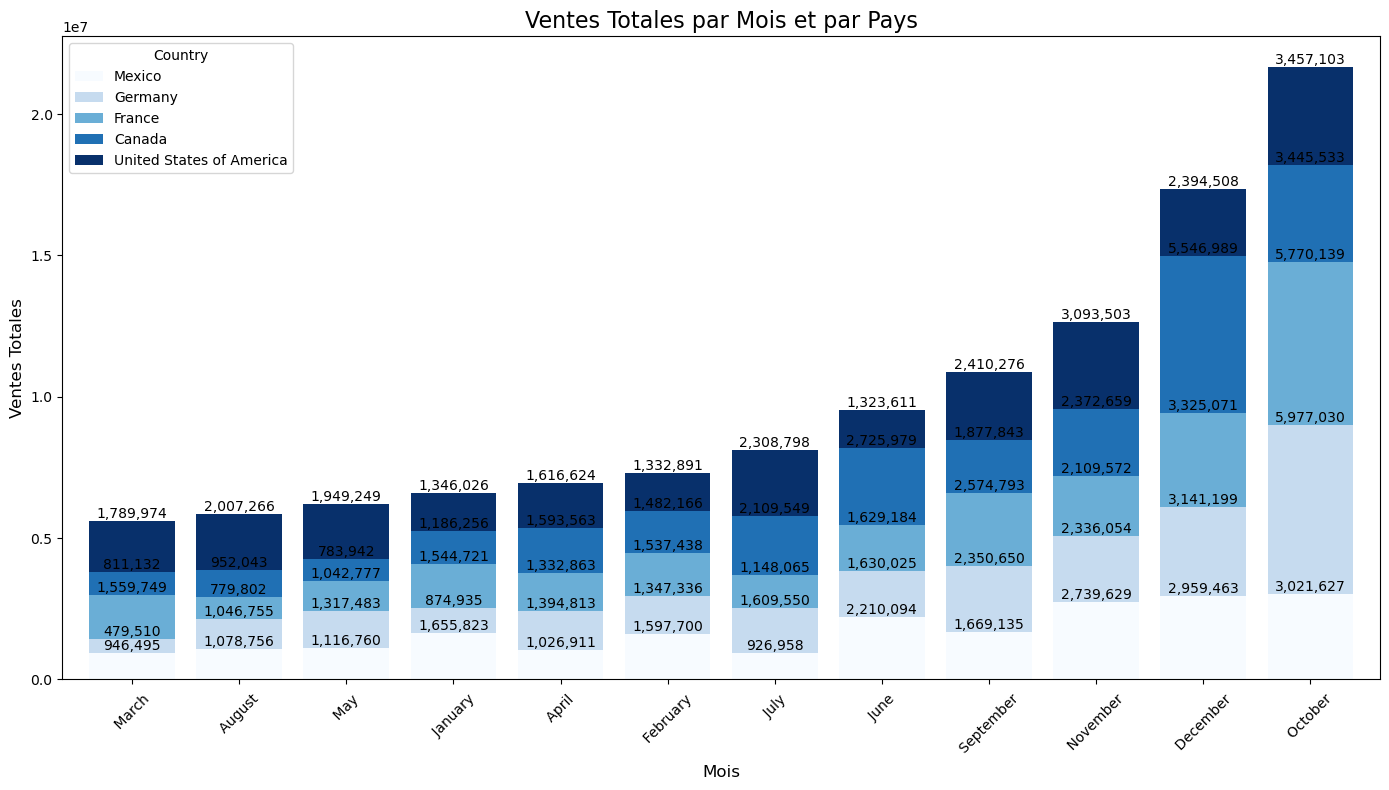

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Importation de NumPy pour les calculs numériques

# Calcul des ventes totales par mois et par pays
month_country_sales = df.groupby(["Month Name", "Country"])["Sales"].sum().unstack().fillna(0)

# Calcul des ventes totales par mois en additionnant les ventes de tous les pays pour chaque mois
monthly_sales = month_country_sales.sum(axis=1)

# Trier les mois par ventes totales en ordre croissant
month_country_sales = month_country_sales.loc[monthly_sales.sort_values().index]

# Calcul des ventes totales par pays
country_sales_total = month_country_sales.sum(axis=0)

# Trier les pays en fonction de leur ventes totales (ordre croissant)
month_country_sales = month_country_sales[country_sales_total.sort_values().index]

# Création du graphique
plt.figure(figsize=(14, 8))

# Normalisation des ventes pour ordonner les couleurs (de plus foncé à plus clair)
norm = plt.Normalize(vmin=month_country_sales.values.min(), vmax=month_country_sales.values.max())

# Création du graphique en barres empilées avec un colormap en ordre croissant
month_country_sales.plot(kind='bar', stacked=True, colormap='Blues', width=0.8, ax=plt.gca())

# Ajout du titre et des labels
plt.title("Ventes Totales par Mois et par Pays", fontsize=16)
plt.xlabel("Mois", fontsize=12)
plt.ylabel("Ventes Totales", fontsize=12)

# Rotation des labels de l'axe X pour une meilleure lisibilité
plt.xticks(rotation=45)

# Affichage des valeurs sur les barres
for i, country in enumerate(month_country_sales.columns):
    for j, val in enumerate(month_country_sales[country]):
        plt.text(j, val + sum(month_country_sales.iloc[j, :i]), f'{val:,.0f}', ha='center', va='bottom', fontsize=10)

# Ajustement des marges pour éviter que la légende ne coupe le graphique
plt.tight_layout()

# Affichage du graphique
plt.show()


In [35]:
# Calculer le total des ventes par année
total_sales_per_year = df_cleaned.groupby('Year')['Sales'].sum().reset_index()

# Afficher le résultat
print(total_sales_per_year)

   Year        Sales
0  2013  26415255.51
1  2014  92311094.78


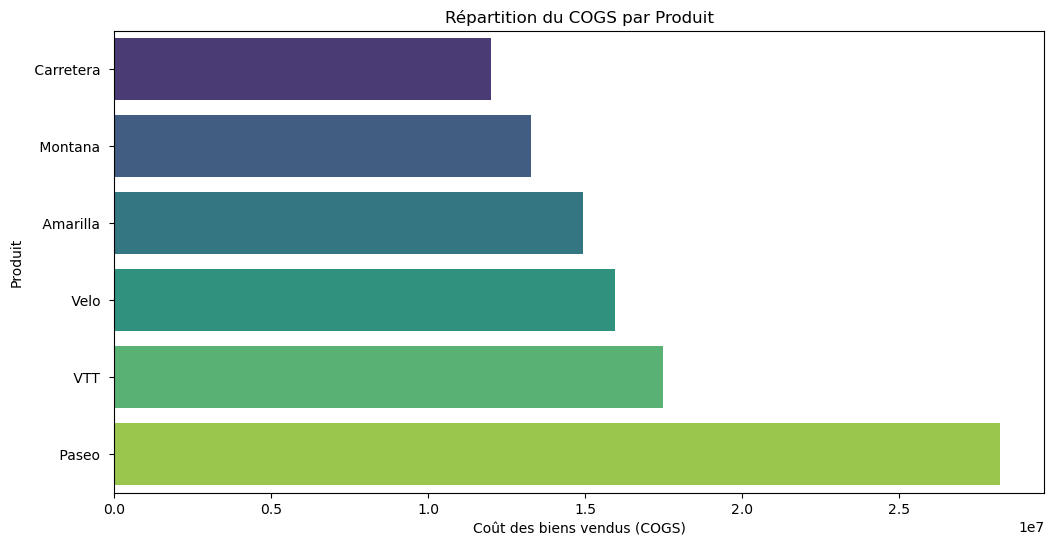

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Regroupement et tri des données
df_grouped = df_cleaned.groupby("Product")["COGS"].sum().reset_index().sort_values(by="COGS", ascending=True)

# Création du diagramme en barres
plt.figure(figsize=(12, 6))
sns.barplot(y=df_grouped["Product"], x=df_grouped["COGS"], palette="viridis")

# Ajout du titre et labels
plt.title("Répartition du COGS par Produit")
plt.xlabel("Coût des biens vendus (COGS)")
plt.ylabel("Produit")

# Affichage du graphique
plt.show()

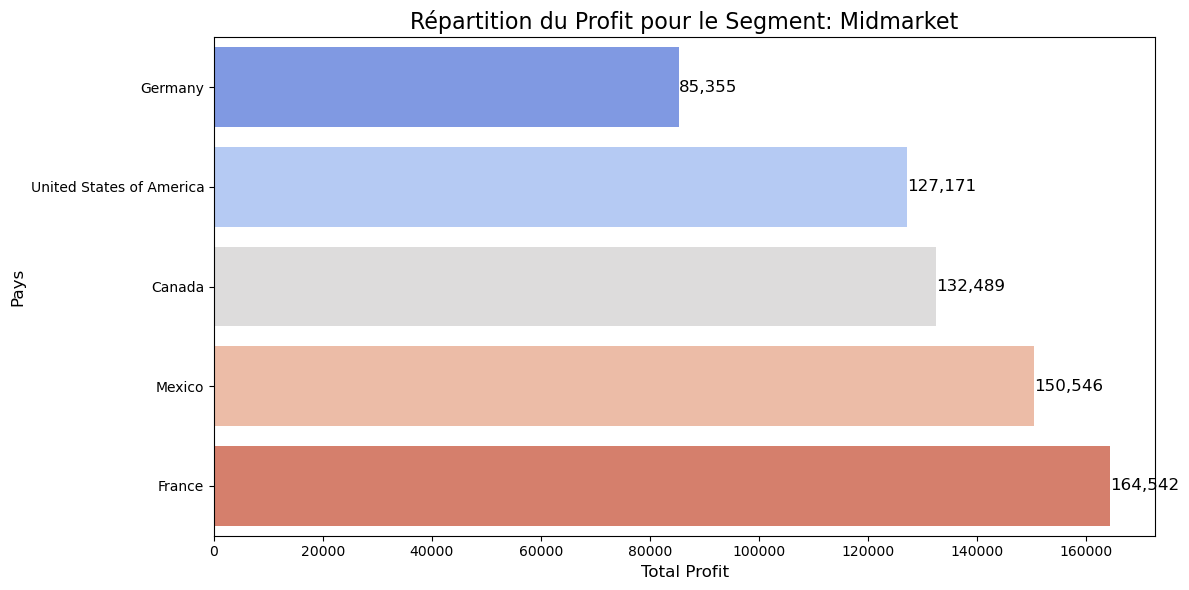

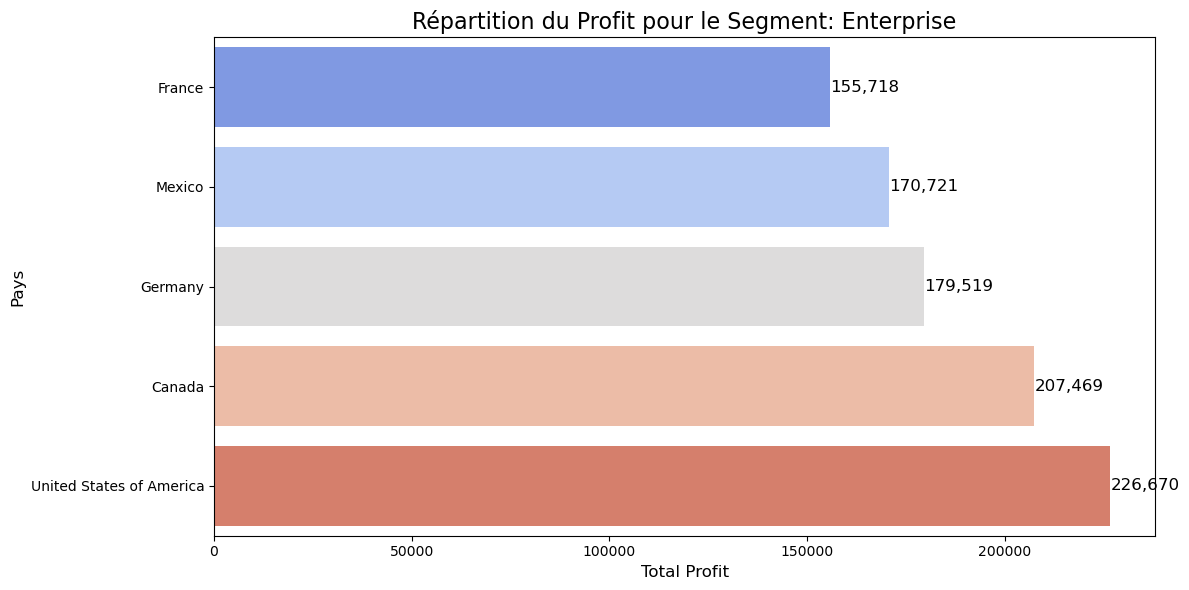

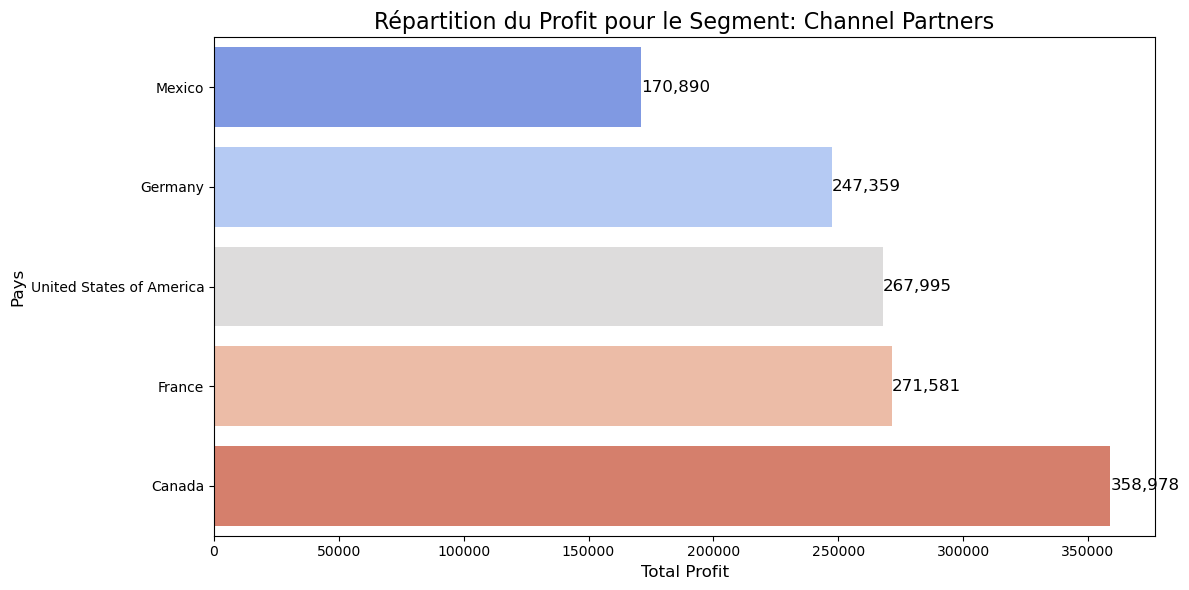

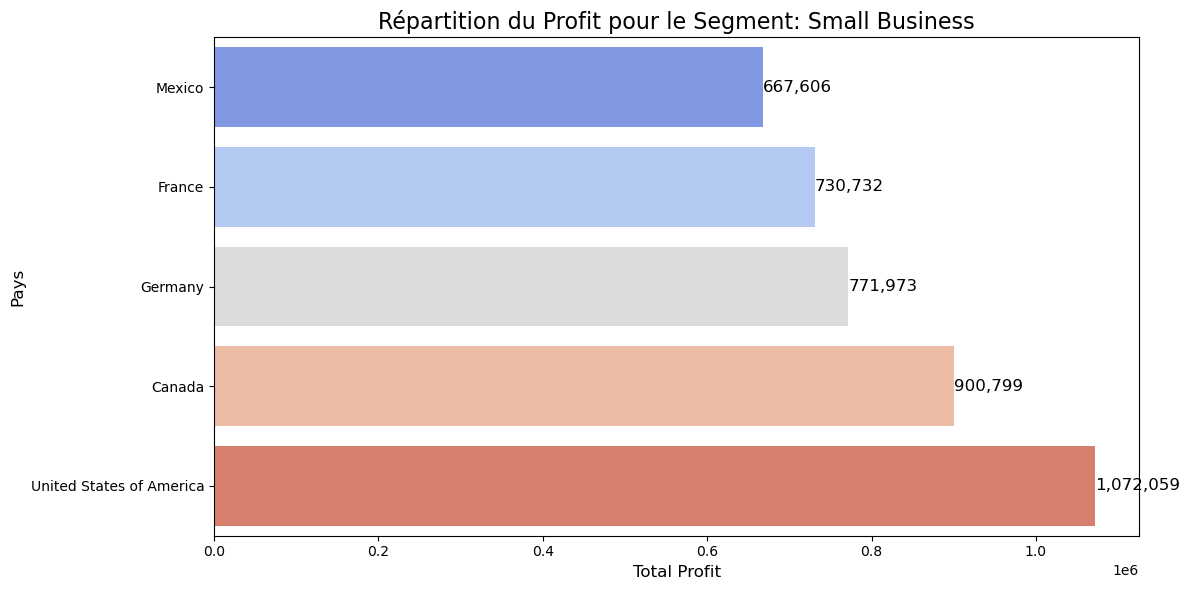

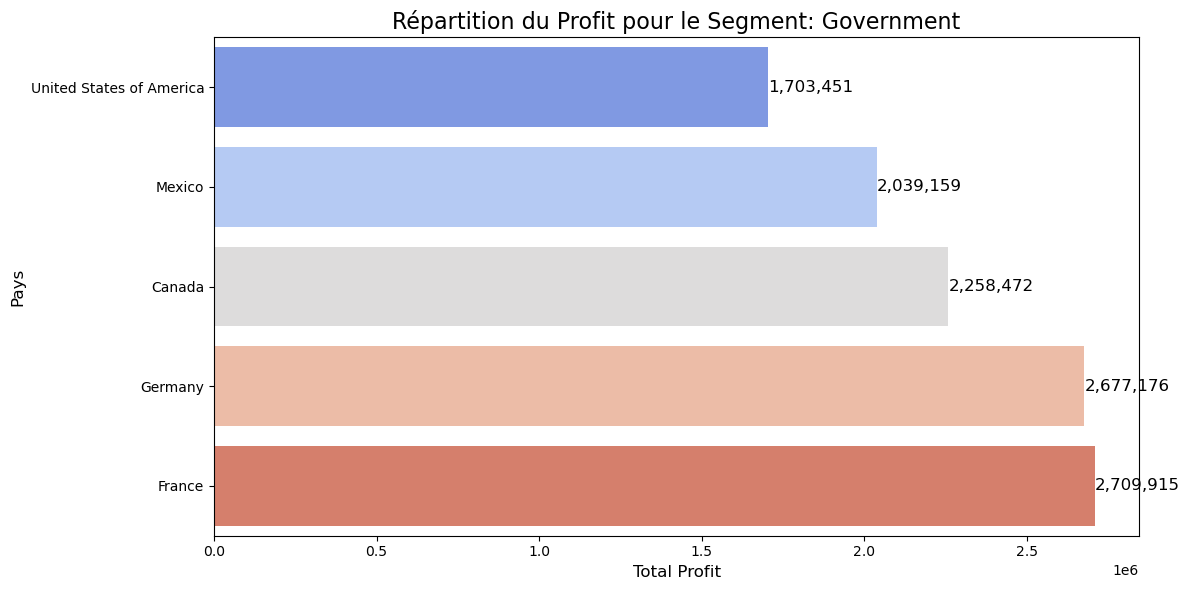

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tri des segments par les ventes totales
segment_sales = df_cleaned.groupby("Segment")["Profit"].sum().sort_values(ascending=True).index

# Création des graphiques pour chaque segment
for segment in segment_sales:
    plt.figure(figsize=(12, 6))
    
    # Filtrage des données pour chaque segment
    segment_data = df_cleaned[df_cleaned["Segment"] == segment]
    
    # Calcul des profits totaux par pays pour chaque segment et tri par ordre croissant
    country_profit = segment_data.groupby("Country")["Profit"].sum().sort_values(ascending=True)
    
    # Création du diagramme en barres trié par les profits totaux
    sns.barplot(x=country_profit.values, y=country_profit.index, palette="coolwarm", orient="h")
    
    # Ajout du titre et des labels
    plt.title(f"Répartition du Profit pour le Segment: {segment}", fontsize=16)
    plt.xlabel("Total Profit", fontsize=12)
    plt.ylabel("Pays", fontsize=12)
    
    # Affichage des valeurs sur les barres
    for index, value in enumerate(country_profit.values):
        plt.text(value, index, f'{value:,.0f}', va='center', ha='left', fontsize=12)
    
    # Ajustement des marges pour éviter que la légende ne coupe le graphique
    plt.tight_layout()
    
    # Affichage du graphique
    plt.show()


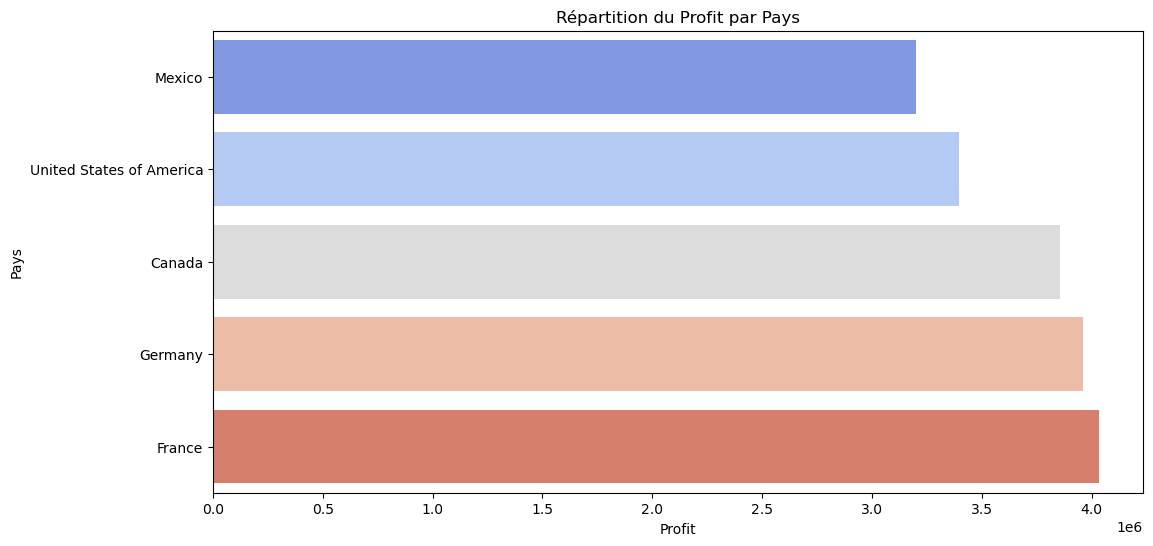

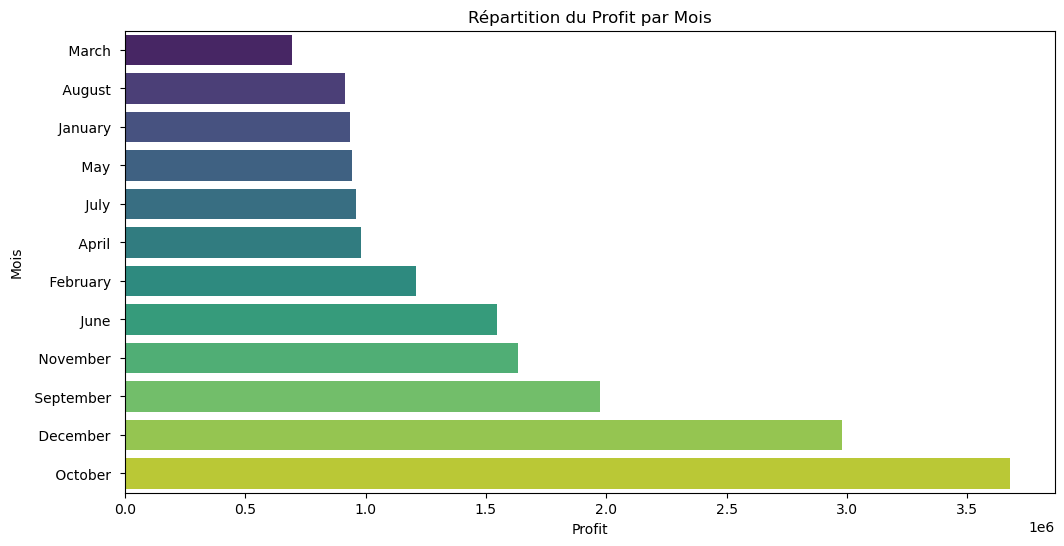

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Graphique des profits par pays
# Regroupement et tri des données par pays
df_grouped_by_country = df_cleaned.groupby("Country")["Profit"].sum().reset_index().sort_values(by="Profit", ascending=True)

# Création du diagramme en barres pour les profits par pays
plt.figure(figsize=(12, 6))
sns.barplot(y=df_grouped_by_country["Country"], x=df_grouped_by_country["Profit"], palette="coolwarm")

# Ajout du titre et labels pour les profits par pays
plt.title("Répartition du Profit par Pays")
plt.xlabel("Profit")
plt.ylabel("Pays")

# Affichage du graphique
plt.show()


# 2. Graphique des profits par mois
# Regroupement et tri des données par mois
df_grouped_by_month = df_cleaned.groupby("Month Name")["Profit"].sum().reset_index().sort_values(by="Profit", ascending=True)

# Création du diagramme en barres pour les profits par mois
plt.figure(figsize=(12, 6))
sns.barplot(y=df_grouped_by_month["Month Name"], x=df_grouped_by_month["Profit"], palette="viridis")

# Ajout du titre et labels pour les profits par mois
plt.title("Répartition du Profit par Mois")
plt.xlabel("Profit")
plt.ylabel("Mois")

# Affichage du graphique
plt.show()

## Déploiement sur site web (Streamlit) 

In [ ]:
import streamlit as st
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données avec mise en cache
@st.cache_data
def load_data():
    return pd.read_csv(r"C:\\Users\\brice\\OneDrive\\Bureau\\HETIC\\Data Viz\\projet\\Financials_cleaned.csv")

df_cleaned = load_data()

# Appliquer un style sombre global
st.markdown(
    """
    <style>
        body {
            background-color: #1e1e1e;
            color: white;
        }
        .kpi-card {
            background: #2b2b2b;
            padding: 20px;
            border-radius: 10px;
            text-align: center;
            box-shadow: 2px 2px 10px rgba(255, 255, 255, 0.2);
            margin: 10px;
        }
        .kpi-value {
            font-size: 24px;
            font-weight: bold;
            color: #ffcc00;
        }
        .sidebar .stSelectbox {
            color: white !important;
        }
    </style>
    """,
    unsafe_allow_html=True
)

# Ajout d'un sélecteur pour filtrer les données
country_filter = st.sidebar.selectbox("🌍 Sélectionnez un pays", ["Tous"] + list(df_cleaned["Country"].unique()))
if country_filter != "Tous":
    df_cleaned = df_cleaned[df_cleaned["Country"] == country_filter]

year_filter = st.sidebar.selectbox("📆 Sélectionnez une année", ["Toutes"] + sorted(df_cleaned["Year"].unique()))
if year_filter != "Toutes":
    df_cleaned = df_cleaned[df_cleaned["Year"] == year_filter]

# Calcul des KPIs
total_sales = df_cleaned["Sales"].sum()
total_units_sold = df_cleaned["Units Sold"].sum()
total_profit = df_cleaned["Profit"].sum()
avg_sale_price = df_cleaned["Sale Price"].mean()
avg_manufacturing_price = df_cleaned["Manufacturing Price"].mean()
profit_margin = (total_profit / total_sales) * 100 if total_sales else 0

# Affichage des KPIs sous forme de cartes bien espacées
st.title("📊 Tableau de Bord des Ventes")

st.markdown("### **📌 Indicateurs Clés de Performance (KPI)**")

kpi_cols = st.columns(3)

kpi_data = [
    ("💰 Ventes Totales", f"{total_sales:,.0f} €"),
    ("📦 Total Unités Vendues", f"{total_units_sold:,.0f}"),
    ("💵 Profit Total", f"{total_profit:,.0f} €"),
    ("💲 Prix de Vente Moyen", f"{avg_sale_price:.2f} €"),
    ("🏠 Prix de Fabrication Moyen", f"{avg_manufacturing_price:.2f} €"),
    ("📈 Marge Bénéficiaire", f"{profit_margin:.2f} %"),
]

for i, (label, value) in enumerate(kpi_data):
    with kpi_cols[i % 3]:
        st.markdown(
            f"""
            <div class="kpi-card">
                <h4>{label}</h4>
                <p class="kpi-value">{value}</p>
            </div>
            """,
            unsafe_allow_html=True,
        )

# Affichage des 10 premières lignes du dataset
st.subheader("👀 Aperçu des 10 premières lignes des données")
st.dataframe(df_cleaned.head(10))

# Classement des pays par ventes et profits
top_countries_sales = df_cleaned.groupby("Country")["Sales"].sum().nlargest(10).reset_index()
top_countries_profit = df_cleaned.groupby("Country")["Profit"].sum().nlargest(10).reset_index()

st.subheader("🏆 Pays par Ventes")
fig_countries_sales = px.bar(
    top_countries_sales, x="Sales", y="Country", orientation='h',
    title="Top 10 Pays par Ventes", text_auto=True, color="Sales", color_continuous_scale="Blues"
)
st.plotly_chart(fig_countries_sales, use_container_width=True)

st.subheader("💰 Pays par Profits")
fig_countries_profit = px.bar(
    top_countries_profit, x="Profit", y="Country", orientation='h',
    title="Top 10 Pays par Profits", text_auto=True, color="Profit", color_continuous_scale="Greens"
)
st.plotly_chart(fig_countries_profit, use_container_width=True)


# Ajout d'un graphique des ventes cumulées
st.subheader("📈 Évolution des Ventes Cumulées")
sales_per_month = df_cleaned.groupby("Month Name")["Sales"].sum().reset_index()
sales_per_month["Cumulative Sales"] = sales_per_month["Sales"].cumsum()
fig_cumulative_sales = px.line(
    sales_per_month, x="Month Name", y="Cumulative Sales", title="Ventes Cumulées Mensuelles",
    markers=True, line_shape='spline', color_discrete_sequence=["#FF5733"]
)
st.plotly_chart(fig_cumulative_sales, use_container_width=True)

# Ajout d'un histogramme pour COGS vs Produits
st.subheader("📉 COGS vs Produits")
cogs_per_product = df_cleaned.groupby("Product")["COGS"].sum().reset_index().sort_values("COGS")
fig_cogs = px.bar(
    cogs_per_product, x="COGS", y="Product", orientation='h',
    title="COGS par Produit (Ordre Croissant)", text_auto=True, color="COGS", color_continuous_scale="Reds"
)
st.plotly_chart(fig_cogs, use_container_width=True)

# Histogramme des profits par segment
st.subheader("💹 Profits par Segment")
profits_per_segment = df_cleaned.groupby("Segment")["Profit"].sum().reset_index().sort_values("Profit")
fig_segment_profit = px.bar(
    profits_per_segment, x="Profit", y="Segment", orientation='h',
    title="Profits par Segment (Ordre Croissant)", text_auto=True, color="Profit", color_continuous_scale="Blues"
)
st.plotly_chart(fig_segment_profit, use_container_width=True)
